# <h1><center>Clustering Analysis on Yeast</center></h1> 

![yeast](https://user-images.githubusercontent.com/31974451/36337383-0099c3ec-134a-11e8-98ff-fabc18643e64.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing the data</a></span></li><li><span><a href="#elbow-method-to-determine-K-in-K-Mean++" data-toc-modified-id="elbow-method-to-determine-K-in-K-Mean++-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>elbow method to determine K in K-Mean++</a></span></li><li><span><a href="#silhouette-plot-to-decide-K-in-K-Mean++" data-toc-modified-id="silhouette-plot-to-decide-K-in-K-Mean++-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>silhouette plot to decide K in K-Mean++</a></span></li><li><span><a href="#K-Mean++-Clustering-with-K-=-3" data-toc-modified-id="K-Mean++-Clustering-with-K-=-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-Mean++ Clustering with K = 3</a></span></li></ul></div>

## Preparing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
yeast_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data", sep='\s+', header=None)
yeast_df.columns = ['Sequence Name', 'mcg', 'gvh','alm', 'mit', 'erl','pox','vac', 'nuc','Class']
yeast_df.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [3]:
yeast_df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [4]:
X = yeast_df.iloc[:,2:4]
X.head()

,gvh,alm
0,0.61,0.47
1,0.67,0.48
2,0.62,0.49
3,0.44,0.57
4,0.44,0.48


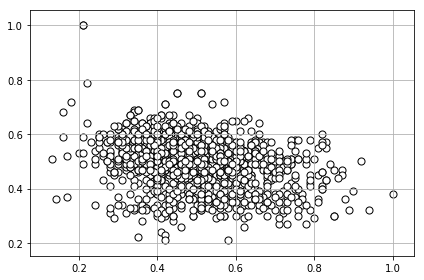

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], 
            c= 'white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

## elbow method to determine K in K-Mean++

In [6]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

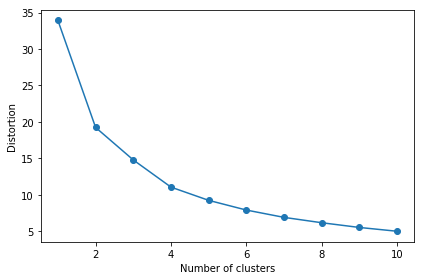

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## silhouette plot to decide K in K-Mean++

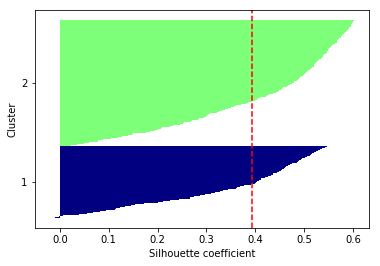

In [14]:
kmeans = KMeans(n_clusters=2, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

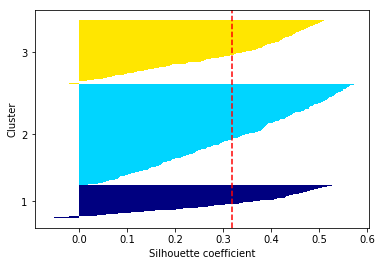

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

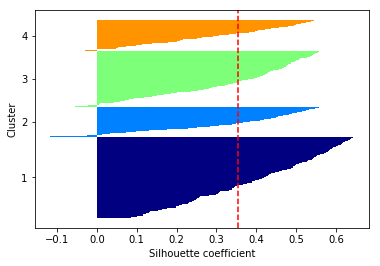

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

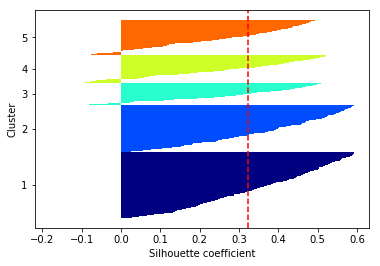

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

It seems that when K =2, Silhouette coefficient is much far away from 0 and even. So we will use k=2 for clustering analysis. 

## K-Mean++ Clustering with K = 3

In [15]:
labels = kmeans.labels_
X["cluster"] = labels
X.head(10)

,gvh,alm,cluster
0,0.61,0.47,0
1,0.67,0.48,0
2,0.62,0.49,0
3,0.44,0.57,1
4,0.44,0.48,1
5,0.40,0.56,1
6,0.54,0.48,0
7,0.45,0.59,1
8,0.50,0.66,1
9,0.39,0.60,1


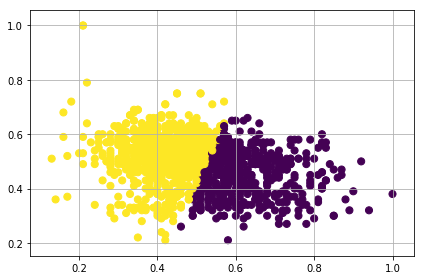

In [16]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], 
            c= X["cluster"], s=50, cmap='viridis')

plt.grid()
plt.tight_layout()
plt.show()